## 数据集的大小对于预测性能的影响

E:\software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


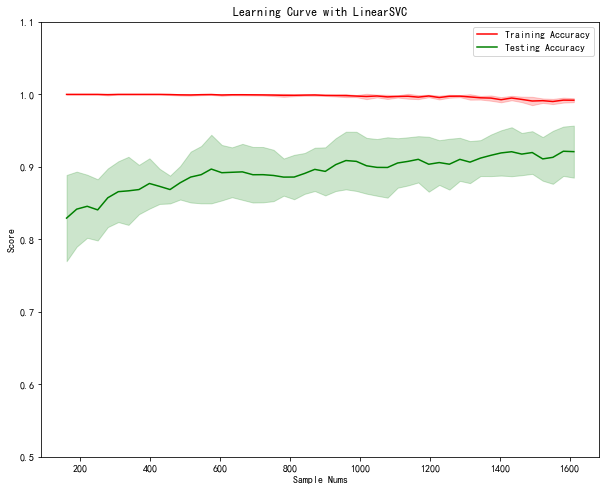

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

# 验证对于LinearSVC分类器
digits = load_digits()
X, y = digits.data, digits.target

train_sizes = np.linspace(0.1, 1.0, endpoint=True)
abs_trains_sizes, train_scores, test_scores = \
    learning_curve(LinearSVC(), X, y, cv=10, 
                   scoring="accuracy", 
                   train_sizes=train_sizes)

# 获取 10 折交叉上的预测得分上的均值和方差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(abs_trains_sizes, train_scores_mean, 
        label="Training Accuracy", color="r")
ax.fill_between(abs_trains_sizes, 
                train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, 
                alpha=0.2, 
                color="r")
ax.plot(abs_trains_sizes, test_scores_mean, 
        label="Testing Accuracy", color="g")
ax.fill_between(abs_trains_sizes, 
                test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, 
                alpha=0.2, 
                color="g")
ax.set_title("Learning Curve with LinearSVC")
ax.set_xlabel("Sample Nums")
ax.set_ylabel("Score")
ax.set_ylim(0.5, 1.1)
ax.legend(loc='best')
plt.show()